In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

E:\Anaconda\Anaconda4.0\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


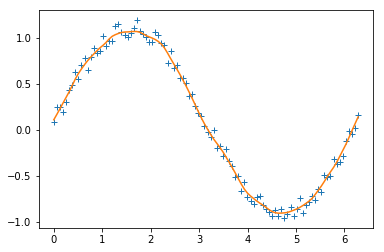

In [4]:
#smothing the curve
import statsmodels.api as sm

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
lowess = sm.nonparametric.lowess(y, x, frac=0.1)

plt.plot(x, y, '+')
plt.plot(lowess[:, 0], lowess[:, 1])
plt.show()

In [99]:
y = [5,4,3,2,2.1,1,.5,.3,.4,.9,1.4,2.0,2.3,1.9,1.7,2.5,3,4,5]
x = range(len(y))

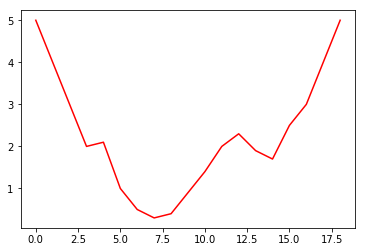

In [101]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-')

In [84]:
xx = np.arange(0, 20, 0.1)

In [85]:
yy = np.interp(xx, x, y)
yy =  yy + np.random.randn(1, len(yy))[0]*.2
yy[20] = 1.2
yy[-30] = 7
yy[80] = 4

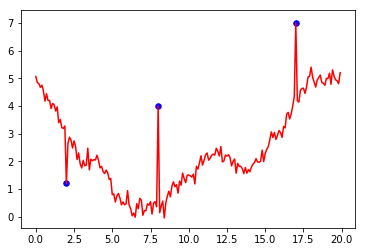

In [86]:
fig, ax = plt.subplots()
ax.plot(xx, yy, 'r-')
ax.scatter(xx[20], yy[20], c='blue',s=30)
ax.scatter(xx[-30], yy[-30], c='blue',s=30)
ax.scatter(xx[80], yy[80], c='blue',s=30)

In [87]:
## remove spikes
import scipy.signal as ss

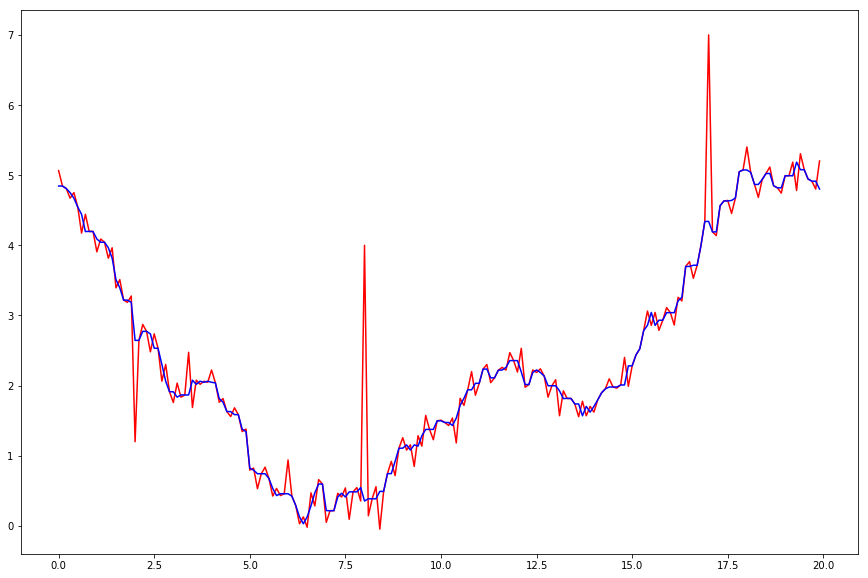

In [88]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xx, yy, 'r-')
ax.plot(xx, ss.medfilt(yy,3), c='blue')

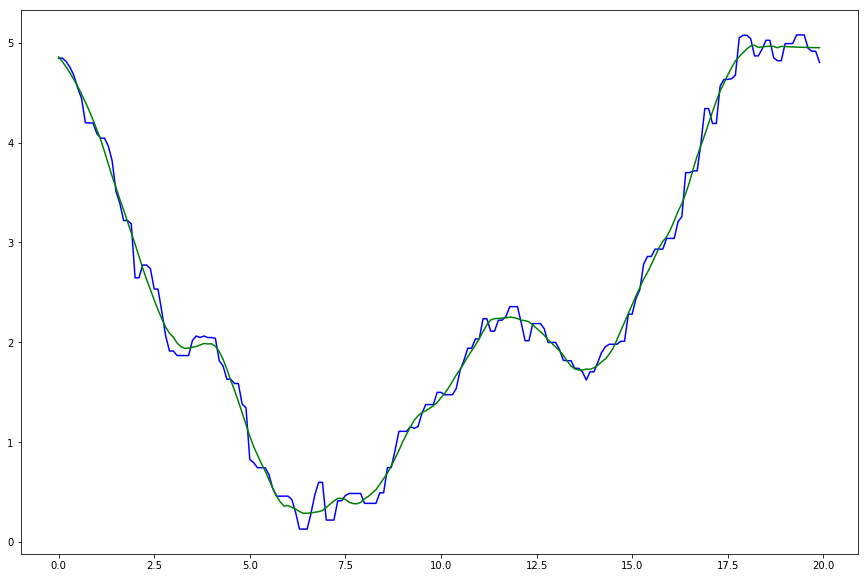

In [98]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xx, ss.medfilt(yy,3), c='blue')
ax.plot(xx, ss.savgol_filter(yy,21,2), c= 'green')

In [8]:
## how to find the spikes (will remove those laster) in a curve
## https://stackoverflow.com/questions/41851044/python-median-filter-for-1d-numpy-array

In [104]:
np.gradient([1,2,3,4,5])

array([ 1.,  1.,  1.,  1.,  1.])

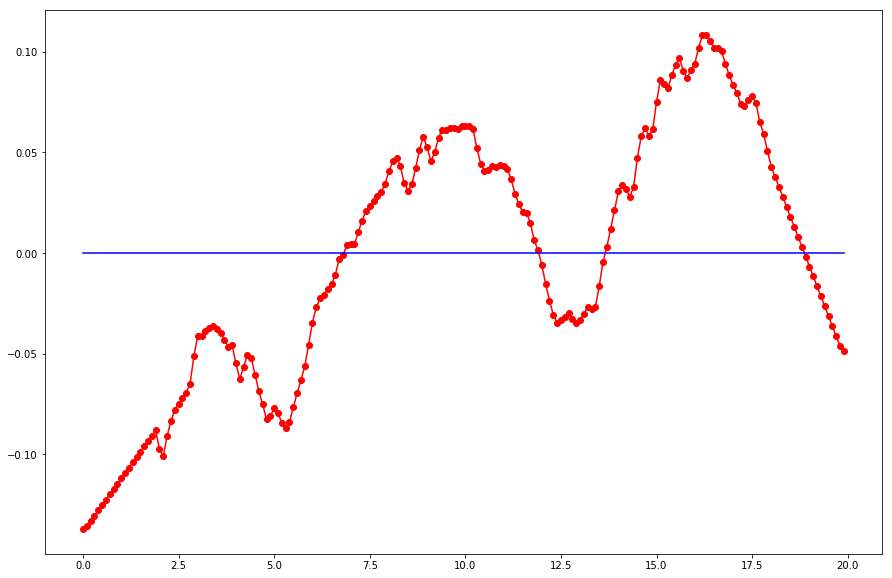

In [111]:
smooth_yy = ss.savgol_filter(yy,41,2)
assert len(yy) == len(smooth_yy)
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xx, np.gradient(smooth_yy), c='r', marker = 'o')
ax.plot(xx, [0]*len(xx), c='b')

In [112]:
np.argmin(np.abs(np.gradient(smooth_yy)))

68

In [123]:
##get the intersections of a decrete array with the line y=0, those are the change-points
g_yy = np.gradient(smooth_yy)
flag = True if g_yy[0] < 0 else False
def get_next(arr, start, flag=True):
    if flag:
        for i in range(start, len(arr)):
            if arr[i] >= 0:
                return i
    else:
        for i in range(start, len(arr)):
            if arr[i] <= 0:
                return i
    return -1
start = 0
inters = []
for i in range(1, len(g_yy)):
    next_ = get_next(g_yy, start, flag)
    if(next_ != -1):
        inters.append(next_)
        start = next_ + 1
        flag = not flag
print(inters)

[69, 120, 137, 189]


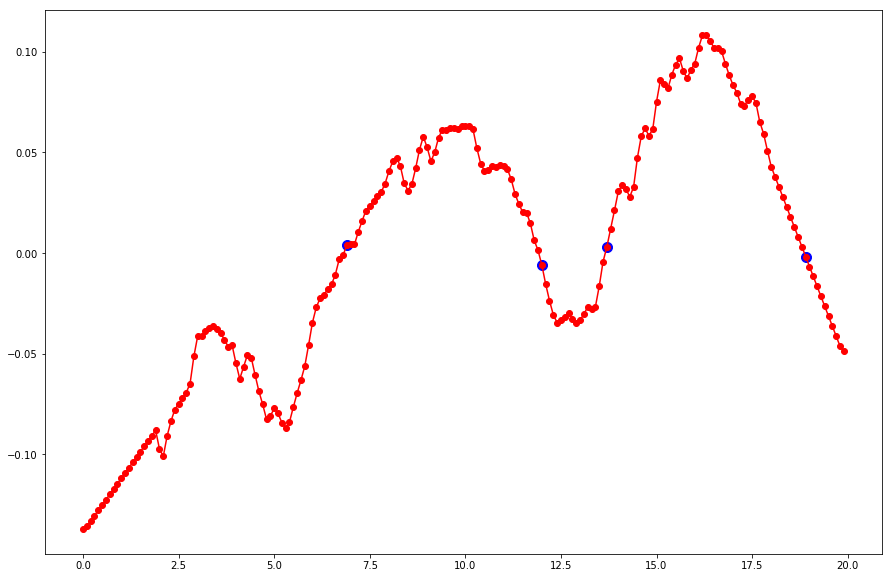

In [125]:
xx_, yy_ = [], []
for idx in [69, 120, 137, 189]:
    xx_.append(xx[idx])
    yy_.append(g_yy[idx])
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xx, g_yy, c='r', marker = 'o')
ax.scatter(xx_, yy_, c='b', s = 100)